## Support vector classifier


In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [2]:
training_data.sample(10)

,Message,Subject,Catagory
19615,"In article <1qu03p$442@horus.ap.mchp.sni.de>, ...","Re: After 2000 years, can we say that Christia...",talk.religion.misc
1351,89' Toyota Camry LE 4 dr sedan\nAC AT power wi...,'89 Toyota Camry - $9000,rec.autos
12358,"\nIn article <C5w8xB.Iv6@world.std.com>, wdm@w...",Re: Adobe Photo Shop type software for Unix/X/...,comp.graphics
6848,In article <1993Apr19.171223.11311@Virginia.ED...,Re: Ron Francis,rec.sport.hockey
11570,Does anyone have a file manager that runs unde...,Looking for a filemanager under X11R5,comp.windows.x
10197,In article <BONG-230493121730@kfp-slac-mac.sla...,Re: Boom! Dog attack!,rec.motorcycles
6533,In article <1993Apr20.184627.4585@newshub.arie...,Re: 1993 NHL Draft,rec.sport.hockey
6599,"\n|> As far as Cheveldae is concerned, he is a...",Re: Wings News and Playoff Thoughts,rec.sport.hockey
3990,I am fortunate enough to have tickets for an O...,Camden Yards,rec.sport.baseball
3974,In article <1993Apr6.025027.4846@oswego.Oswego...,"Re: Joe Robbie Stadium ""NOT FOR BASEBALL""",rec.sport.baseball


In [3]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [4]:
train_vecs = feature_pipeline.fit_transform(training_data["Message"]+training_data["Subject"])

In [5]:
from sklearn import svm

In [6]:
clf = svm.LinearSVC()

In [7]:
clf.fit(train_vecs, training_data["Catagory"])

LinearSVC()

In [8]:
clf.score(train_vecs, training_data.Catagory)

0.9650820965082096

In [9]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Message"]+testing_data["Subject"])
clf.score(testing_vecs, testing_data["Catagory"])

0.7930399866153589

In [10]:
from mlworkflows import plot

df, chart =plot.confusion_matrix(testing_data.Catagory, clf.predict(testing_vecs))

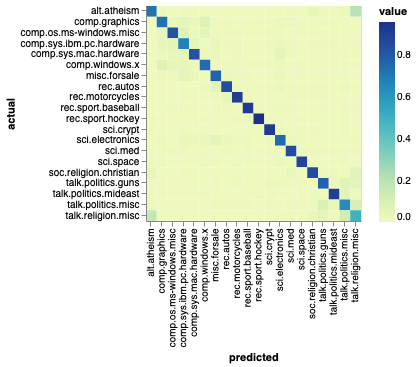

In [11]:
chart

In [12]:
from sklearn.metrics import classification_report
print(classification_report(testing_data.Catagory, clf.predict(testing_vecs)))


                          precision    recall  f1-score   support

             alt.atheism       0.69      0.71      0.70       284
           comp.graphics       0.72      0.71      0.72       303
 comp.os.ms-windows.misc       0.76      0.82      0.79       293
comp.sys.ibm.pc.hardware       0.72      0.67      0.69       303
   comp.sys.mac.hardware       0.78      0.82      0.80       286
          comp.windows.x       0.74      0.74      0.74       280
            misc.forsale       0.79      0.76      0.77       305
               rec.autos       0.83      0.84      0.84       300
         rec.motorcycles       0.89      0.90      0.89       317
      rec.sport.baseball       0.91      0.92      0.91       291
        rec.sport.hockey       0.93      0.95      0.94       310
               sci.crypt       0.92      0.91      0.92       303
         sci.electronics       0.70      0.74      0.72       274
                 sci.med       0.84      0.84      0.84       314
         